## 回帰分析
今回は線形回帰とその正則化について扱います。

### 回帰分析とは

変数$y$を予測したい。
これに対して説明変数$x_1,\ldots,x_k$が与えられている。
学習データとして$(x_1^{(1)},\ldots,x_k^{(1)},y^{(1)}),\ldots,(x_1^{(N)},\ldots,x_k^{(N)},y^{(N)})$が与えられたとする。
この時線形モデル

$$
y=f_w(x)=w_0+w_1x_1+\cdots+w_kx_k+\epsilon
$$

を推定する。
ここで$\epsilon$は正規分布$N(0,\sigma^2)$に独立に従うと仮定する。

### 単回帰

まずは説明変数が一つのモデルを考えよう。
このようなモデルのことを単回帰という。

学習データ$(x^{(i)},y^{(i)})$で$i=1,\ldots,N$が与えられたとする。
$y$を記述するモデル$y=w_0+w_1x=f_w(x)$を学習しよう。
この式$y=w_0+w_1x$は$xy$平面上の直線を表す。

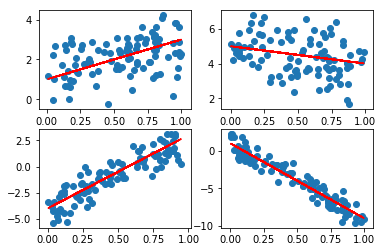

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N=100
sigma=1.0

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

x=np.random.rand(N)
w0,w1=1,2
e=np.random.normal(0,sigma,N)
y=w0+w1*x+e
ax0.scatter(x,y)
ax0.plot(x,w0+w1*x,c='r')

x=np.random.rand(N)
w0,w1=5,-1
e=np.random.normal(0,sigma,N)
y=w0+w1*x+e
ax1.scatter(x,y)
ax1.plot(x,w0+w1*x,c='r')

x=np.random.rand(N)
w0,w1=-4,7
e=np.random.normal(0,sigma,N)
y=w0+w1*x+e
ax2.scatter(x,y)
ax2.plot(x,w0+w1*x,c='r')


x=np.random.rand(N)
w0,w1=1,-10
e=np.random.normal(0,sigma,N)
y=w0+w1*x+e
ax3.scatter(x,y)
ax3.plot(x,w0+w1*x,c='r')

plt.show()

### 最小二乗法

$$
E(w)=\sum_{i=1}^{N}(y^{(i)}-f_w(x^{(i)}))^2
$$

を最小にする$w$を求める。これを最小二乗法という。

以下の手順に従って、学習データが与えられた時の回帰モデルのパラメータを決定せよ。

- モデルの式を$y=w_0+w_1x$として、$E(w_0,w_1)$を記述する。
- $E$の偏微分$\dfrac{\partial E}{\partial w_0},\dfrac{\partial E}{\partial w_1}$を計算する。
- これらを共に$0$にするような$w_0,w_1$を求める。
- これらがちゃんと最小値を与えることを確認する。（微分が消えてることは必要条件でしかないことに注意する）


$$
E=\sum_i(y^{(i)}-w_0-w_1x^{(i)})^2
$$
であり、
$$
\frac{\partial E}{\partial w_0}=\sum_i(-2y^{(i)}-2w_0-2w_1x^{(i)})=0\\
\frac{\partial E}{\partial w_1}=\sum_i(-2y^{(i)}x^{(i)}-2w_0x^{(i)}-2w_1(x^{(i)})^2)=0
$$
を解けば良い。
これは実際には$w_0, w_1$に関する連立一次方程式。
これを正規方程式という。

この場合にはモデルが単純なので、$E$を最小化する$w$の値をきっちり求めることができる。


これを実装しよう。
学習データ$(x^{(1)},y^{(1)}),\ldots,(x^{(N)},y^{(N)})$が与えられた時、

上の方法で$w_0, w_1$を求め、さらに学習データと求めた直線を図示するプログラムを書こう。

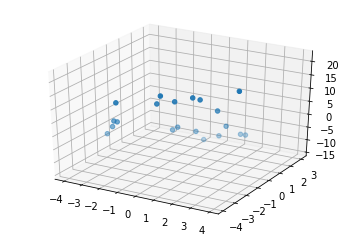

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mean = [0, 0]
cov = [[3, 0], [0, 5]]
x, y = np.random.multivariate_normal(mean, cov, 20).T
w0, w1, w2=0,3,-5
ax.scatter(x,y,w0+w1*x+w2*y)
plt.show()

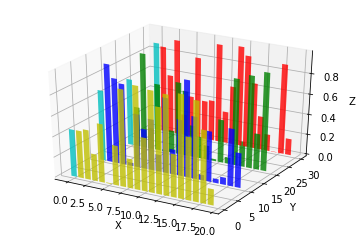

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### 重回帰

一般に説明変数を複数持つモデルを考えよう。
こちらも同様に最小二乗法でモデルの推定ができる。

変数が大量にあってややこしいので行列とベクトルを用いて書くことにしよう。

学習データ$(y^{(1)},x_0^{(1)}=1,x_1^{(1)},\ldots,x_k^{(1)}),\ldots,(y^{(1)},x_0^{(N)}=1,x_1^{(N)},\ldots,x_k^{(N)})$が与えられた時、
行列$X=\begin{pmatrix}x_0^{(1)}&\cdots&x_k^{(1)}\\ \vdots \\ x_0^{(N)}&\cdots &x_k^{(N)}\end{pmatrix}$とし
$y=\begin{pmatrix}y^{(1)}\\ \vdots \\ y^{(N)}\end{pmatrix}$とする。
この時最小二乗法による誤差関数は
$$
E(w)=(y-Xw)^T(y-Xw)
$$
とかける。

ベクトル$w, a$および行列$A$を
$$
w=\begin{pmatrix}w_0\\w_1\\ \vdots \\ w_k\end{pmatrix},
a=\begin{pmatrix}a_0\\a_1\\ \vdots \\ a_k\end{pmatrix},
A=\begin{pmatrix}a_{00}&a_{01}&\cdots&a_{0k}\\ \vdots &\vdots&\cdots&\vdots\\ a_{k0}&a_{k1}&\cdots&a_{kk}\end{pmatrix}
$$
とする。
関数
$$
f(w)=a^Tw=a_0w_0+a_1w_1+\cdots+a_kw_k\\
g(w)=w^Ta=w_0a_0+w_1a_1+\cdots+w_ka_k\\
h(w)=w^TAw\\
=w_0(w_0a_{00}+w_1a_{01}+\cdots+w_ka_{0k})+w_1(w_0a_{10}+w_1a_{11}+\cdots+w_ka_{1k})+\cdots\\
+w_k(w_0a_{k0}+w_1a_{k1}+\cdots+w_ka_{kk})
$$
の勾配はそれぞれ
$$
grad(f)=a\\
grad(g)=a\\
grad(h)=(A+A^T)w
$$
となる。

上の公式を使って$grad(E)$を計算すると
$$
grad(E)=X^Ty-X^TXw
$$
となり、これが$0$となる$w$は$w=(X^TX)^{-1}X^Ty$と求めることができる。

$X^TX$に逆行列が必ず存在するのか？
ほとんどの場合そのまま存在し、もし存在しなくてもデータをほんのわずかずらせば逆行列が存在するようにできる

### 正規方程式

上の計算をまとめると、
$$
w=(X^TX)^{-1}X^Ty
$$

と正確に計算できる。

単回帰の時の式がこれから出てくることを確認しよう。

これを実装しよう。今回は行列の計算は例えばnumpyを使ってやることにします。

## 最尤法

最小二乗法の式は最尤法でパラメータ$w_0, w_1$を推定した結果であるとみなすことができる。
それを説明しよう。

$y$の誤差が平均0で分散$\sigma^2$の正規分布に従うとすれば、
$y$も平均$f(x)$で分散$\sigma^2$の正規分布に従うことがわかる。

観測データが$(x_1,y_1),\ldots,(x_N,y_N)$と与えられた場合、尤度関数

$$
\prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{1}{2\sigma^2}(y_i-f_w(x_i))^2)
$$

を最大化するパラメタ$w, \sigma^2$を選択する。
これは結局

$$
E(w)=\sum^N_{i=1}(y_i-f_w(x_i))^2
$$

を最小化すればよい。

これを最小二乗法という。
つまり、観測値$y_i$とモデルによる予測値$f_w(x_i)$の差の二乗の和を最小にしよう、ということ。


## 正則化

過学習を防ぐために正則化をする必要がある。
ここでは回帰のモデル推定においてパラメタ$w$の事前分布を設定することで正則化項が現れることを見よう。

### Ridge回帰

まずは$w$が$k+1$変数の正規分布に従うとする。（これは正規分布に対して自然な共役分布である。）
この場合に密度関数は
$$
f(w_0,\ldots,w_k)=\frac{1}{2\pi\alpha^2}\exp(-\dfrac{w_0^2+\cdots+w_k^2}{2\alpha^2})
$$
で与えられる。

ベイズの定理を使って事後分布の尤度関数を計算すると、
$$
\prod_i\exp(-\frac{1}{2\sigma^2}(y^{(i)}-f_w(x^{(i)}))^2)\times\frac{1}{2\pi\alpha^2}\exp(-\dfrac{w_0^2+\cdots+w_k^2}{2\alpha^2})
$$
となる。
密度関数は積分を計算しないといけないので今回は省略するが、これの定数倍になる。

つまり
$$
E(w)=\sum_{i=1}^N(y^{(i)}-(w^Tx^{(i)}))^2+\lambda\sum_{i=0}^Nw_i^2
$$
なる関数を最小化することになる。
ここで$\lambda=\sigma^2/\tau^2$である。

この解は重回帰の時と同じように偏微分を計算することで正確に求めることができて、
$$
\hat{w}_{ridge}=(\lambda I_k+X^TX)^{-1}X^Ty
$$
となる。
これをridge回帰という。

### Lasso回帰

事前分布を正規分布以外の分布にすれば異なる正則化項を導くことができる。

事前分布をラプラス分布とする。
この場合に密度関数は
$$
f(w_0,\ldots,w_k)=\frac{1}{2\pi\alpha^2}\exp(-\dfrac{\abs{w_0}+\cdots+\abs{w_k}}{2\alpha^2})
$$
で与えられる。

この場合の誤差関数は
$$
E(w)=\frac{1}{N}\sum_i^N(y^{(i)}-(w^Tx^{(i)}))^2+\lambda\sum_{i=0}^N\abs{w_i}
$$
なる関数を最小化することになる。
これをlasso回帰と呼ぶ。


lasso回帰では誤差関数
$$
E(w)=\sum_{i=1}^N(y^{(i)}-(w^Tx^{(i)}))^2+\lambda\sum_{i=0}^N\abs{w_i}
$$
を最小化する。

### スパース性
ridge回帰とlasso回帰の違い。
学習方法を見てもわかるように、lasso回帰は係数が$0$になりやすいという特徴がある。
従って多くの説明変数の中から変数を選択できる。

Lagrangeの未定乗数法によるスパース性の説明

### 最適化

このモデルを学習する際に、絶対値は微分できないので少し工夫が必要になる。
そのアルゴリズムにはいくつかあるが、ここでは座標降下法と呼ばれる方法を説明する。
これは次のようにパラメータを一つずつ順番に決定していく手法。

まず正則化項なしで推定するなどして適当にパラメータの初期値を設定する。
$w_j, j=1,\ldots,k$を順番に更新していく。
$$
a_j=\sum_{i=1}^N(x_j^{(i)})^2\\
c_j=2\sum_{i=1}^Nx_j^{(i)}(y^{(i)}-w^Tx^{(i)}+w_jx_j^{(i)})
$$とすれば
$$
E(w)=a_jw_j^2+c_jw_j+\lambda\abs{w_j}+{\rm const.}
$$
となる。
従って下の問題のように考えると、
$$
w_j=\begin{cases}(c_j+\lambda)/2a_j & c_j<-\lambda\\ 0& -\lambda\leq c_j\leq\lambda\\ (c_j-\lambda)/2a_j&c_j>\lambda\end{cases}
$$
とパラメータを更新する。
これを収束するまで繰り返す。

$f(x)=ax^2+cx+\lambda\abs{x}$の最小値が$c, \lambda$の値によってどのように変化するか考えよう。
これが係数が$0$になりやすい理由である。

## ロバスト推定
正規分布は外れ値の影響を受けやすい。
従って、最小二乗法によるパラメータの推定は外れ値の影響を受けやすい。

モデル$y$（あるいは誤差）の分布として正規分布以外の分布を考えれば他の誤差関数を選択できる。
ここでは、$E(w)$を他の関数に置き換えることで対応する。


$x_0,\ldots,x_N$が与えられた時、次の関数を最小にする$w$を求めよ。

$$
E_1(w)=\sum_{i=0}^N\abs{x_i-w}\\
E_2(w)=\sum_{i=0}^N(x_i-w)^2
$$

平均値と中央値では中央値の方が外れ値の影響を受けないということを考えると、$E_1$の方が$E_2$よりも外れ値の影響を受けない。
このように誤差の二乗を用いずに、他の関数を用いて$E(w)$を定義し、$E(w)$を最小化することでモデル推定する。

ここではHuber損失関数と呼ばれるパラメータ$\eta$を持つ損失関数の例を考える。
$$
\rho_\eta(r)=
\begin{cases}
\frac{r^2}{2} &\abs{r}\leq\eta\\
\eta\abs{r}-\frac{\eta^2}{2} &\abs{r}>\eta
\end{cases}
$$
を考え、$E(w)=\sum_i\rho_\eta(y_i-f_w(x_i))$を最小化する。
$\eta$を$0$に近づけると上で用いた絶対値を用いた最小化で、$\eta=\infty$は最小二乗法と同じ。

他にもTukey損失関数などいろいろな損失関数があり、これらは外れ値の影響を受けにくいロバスト回帰と呼ばれる手法を与える。

この$E(w)$を最小化するには、例えば次のような方法がある。
- 準ニュートン法や勾配法
- 重み付き最小二乗法

ここでは勾配法について簡単に説明する。
パラメータが二変数$w_0,w_1$の場合に考える。
$E(w_0,w_1)$の偏微分の組みを勾配と呼ぶ。
$$
\nabla E=(\frac{\partial E}{\partial w_0},\frac{\partial E}{\partial w_1})
$$
適当に$w=w^{(0)}$を決めて、そこでの勾配$g=\nabla E(w^{(0)})$を計算する。
勾配と逆方向に$w$を変化させると$E$の値が減っていく。
つまりパラメータ$t$をとり$E(w^{(0)}-gt)$を計算する。
$t$を適当な間隔で計算し、これが最小になる点を$w^{(1)}=w^{(0)}-gt$とする。
この操作を繰り返すと$E$が最小になる$w$を求めることができる。